# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [69]:
# Import thư viện: 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [174]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


In [154]:
covid_df.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total tests', 'Tests/1M pop',
       'Population', 'Continent', '1 Case every X ppl', '1 Death every X ppl',
       '1 Test every X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [216]:
# Define the custom formatting function
def format_y_axis(value, pos=0):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.2f}B"
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return f"{value:.0f}"

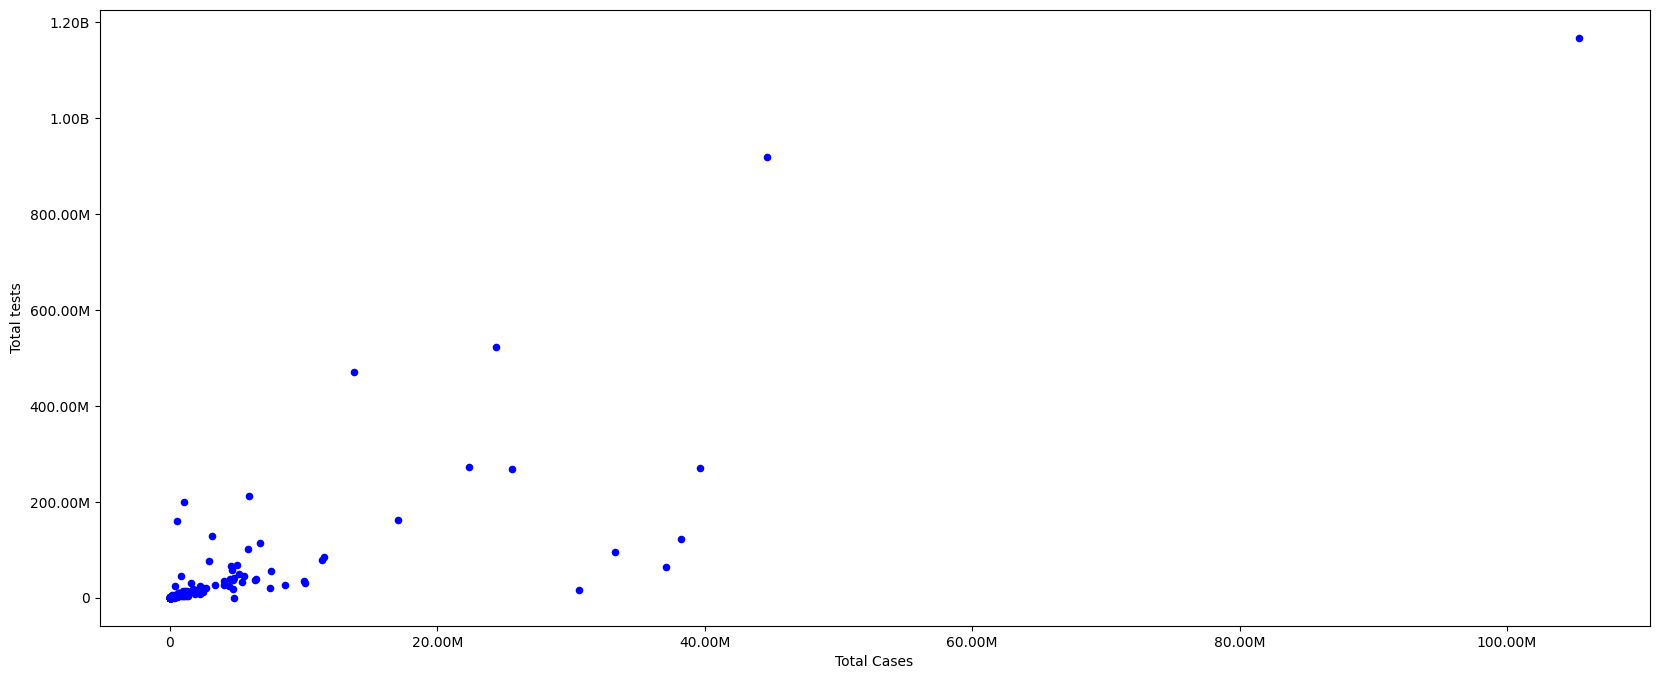

In [218]:
fig, ax = plt.subplots()

covid_df[['Total Cases', 'Total tests']].plot.scatter(x='Total Cases', y='Total tests', ax=ax, color='blue', figsize=(20, 8))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

In [177]:
covid_df[covid_df['1 Case every X ppl'] == 0]

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
225,Diamond Princess,712.0,0.0,13.0,0.0,699.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
228,MS Zaandam,9.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0


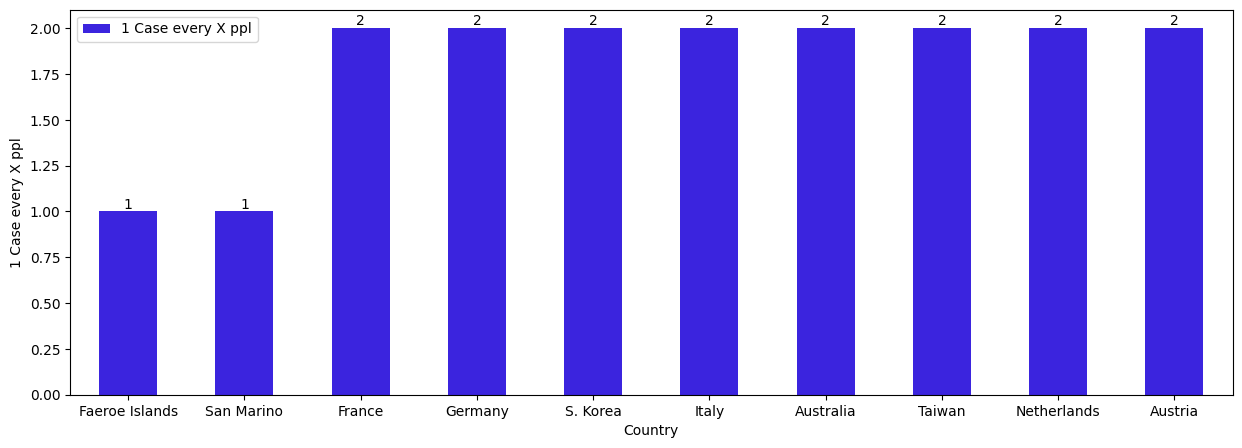

In [178]:
fig, ax = plt.subplots()

covid_df.drop(covid_df[covid_df['1 Case every X ppl'] == 0].index)[['Country', '1 Case every X ppl']].nsmallest(n=10, columns=['1 Case every X ppl']).plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(15, 5),
    x='Country',
    xlabel="Country",
    ylabel='1 Case every X ppl',
    fontsize=10, ax=ax,
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
# Show the plot
plt.show()

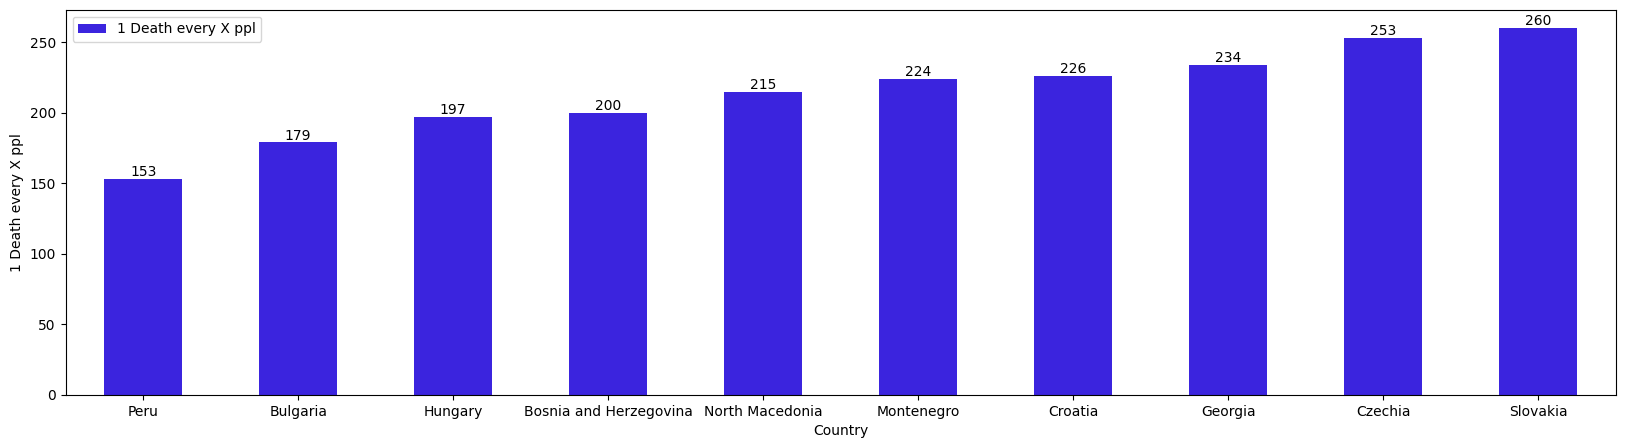

In [183]:
fig, ax = plt.subplots()

covid_df.drop(covid_df[covid_df['1 Death every X ppl'] == 0].index)[['Country', '1 Death every X ppl']].nsmallest(n=10, columns=['1 Death every X ppl']).plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(20, 5),
    x='Country',
    xlabel="Country",
    ylabel='1 Death every X ppl',
    fontsize=10, ax=ax,
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
# Show the plot
plt.show()

In [202]:
continent_total_cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Cases"].agg(sum))

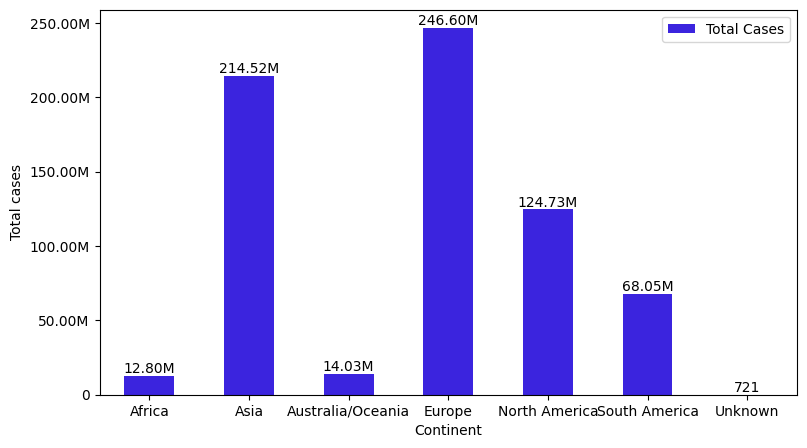

In [203]:
# Generate the plot
fig, ax = plt.subplots()
continent_total_cases.plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(9, 5), 
    xlabel="Continent",
    ylabel="Total cases",
    fontsize=10, ax=ax,
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in continent_total_cases.iloc[:, 0]], 
    label_type="edge",
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)
# Show the plot
plt.show()

In [143]:
data = pd.DataFrame(covid_df.groupby(["Continent"])[["Total Deaths", "Total Recovered"]].agg(sum));

data = data.reset_index('Continent')
data

,Continent,Total Deaths,Total Recovered
0,Africa,258593.0,10958582.0
1,Asia,1537601.0,182369187.0
2,Australia/Oceania,26221.0,13804048.0
3,Europe,2019501.0,242049974.0
4,North America,1612602.0,119887065.0
5,South America,1350941.0,65553207.0
6,Unknown,15.0,706.0


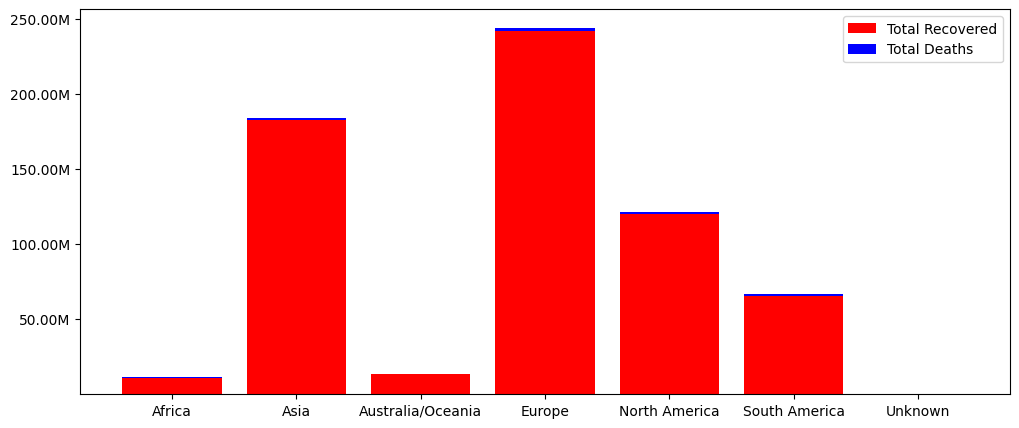

In [152]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Set the x-axis tick labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels(data['Continent'])

# Plot the first set of bars
ax.bar(range(len(data)), data['Total Recovered'], color='red', label='Total Recovered')

# Plot the second set of bars
ax.bar(range(len(data)), data['Total Deaths'], color='blue', label='Total Deaths', bottom=data['Total Recovered'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
# Add a legend
ax.legend()

# Show the plot
plt.show()

In [146]:
data_1 = covid_df[["Country", "Total Deaths", "Total Recovered"]].nlargest(n=10, columns=["Total Recovered"]).sort_values(ascending=False, by=["Total Recovered"])
data_1

,Country,Total Deaths,Total Recovered
0,USA,1146740.0,102864696.0
1,India,530775.0,44154425.0
2,France,165030.0,39400459.0
3,Germany,168397.0,37767300.0
4,Brazil,699276.0,36249161.0
6,S. Korea,34034.0,30363195.0
7,Italy,188322.0,25267118.0
8,UK,206952.0,24106232.0
5,Japan,72805.0,21694886.0
9,Russia,396336.0,21686422.0


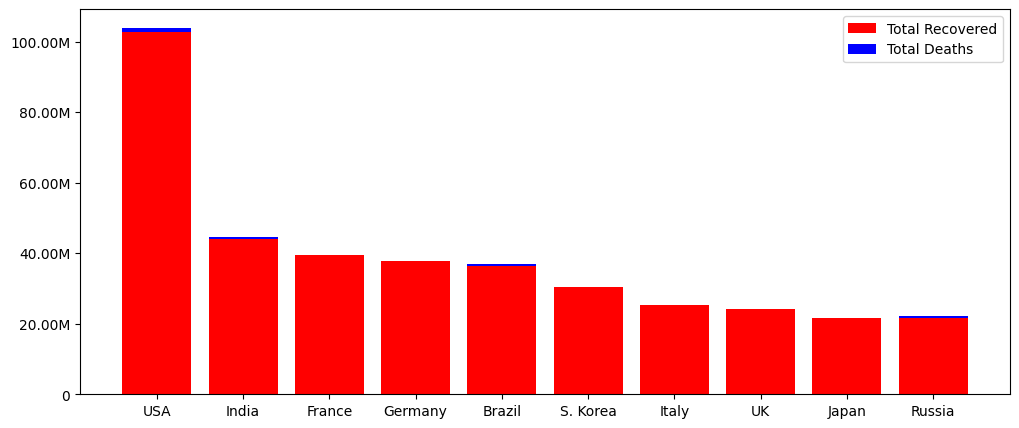

In [153]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Set the x-axis tick labels
ax.set_xticks(range(len(data_1)))
ax.set_xticklabels(data_1['Country'])

# Plot the first set of bars
ax.bar(range(len(data_1)), data_1['Total Recovered'], color='red', label='Total Recovered')

# Plot the second set of bars
ax.bar(range(len(data_1)), data_1['Total Deaths'], color='blue', label='Total Deaths', bottom=data_1['Total Recovered'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
# Add a legend
ax.legend()

# Show the plot
plt.show()

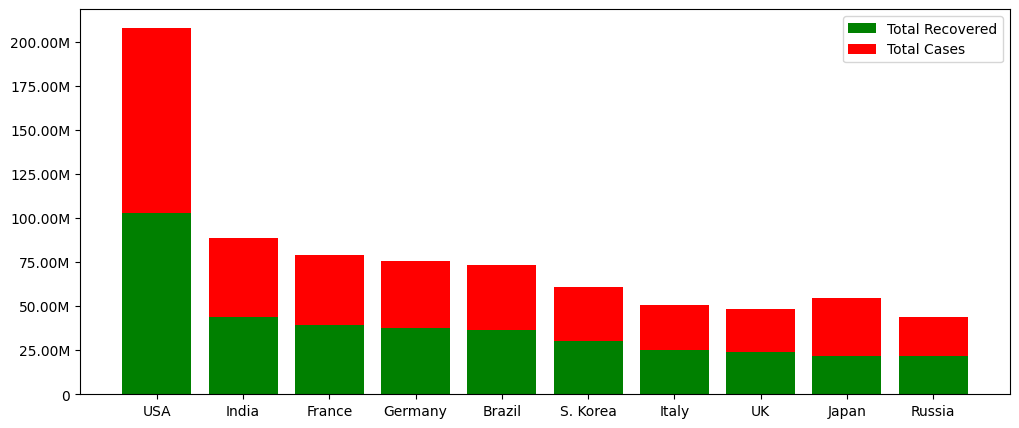

In [185]:
data_2 = covid_df[["Country", "Total Cases", "Total Recovered"]].nlargest(n=10, columns=["Total Recovered"]).sort_values(ascending=False, by=["Total Recovered"])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Set the x-axis tick labels
ax.set_xticks(range(len(data_2)))
ax.set_xticklabels(data_2['Country'])

# Plot the first set of bars
ax.bar(range(len(data_2)), data_2['Total Recovered'], color='green', label='Total Recovered')

# Plot the second set of bars
ax.bar(range(len(data_2)), data_2['Total Cases'], color='red', label='Total Cases', bottom=data_2['Total Recovered'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
# Add a legend
ax.legend()

# Show the plot
plt.show()

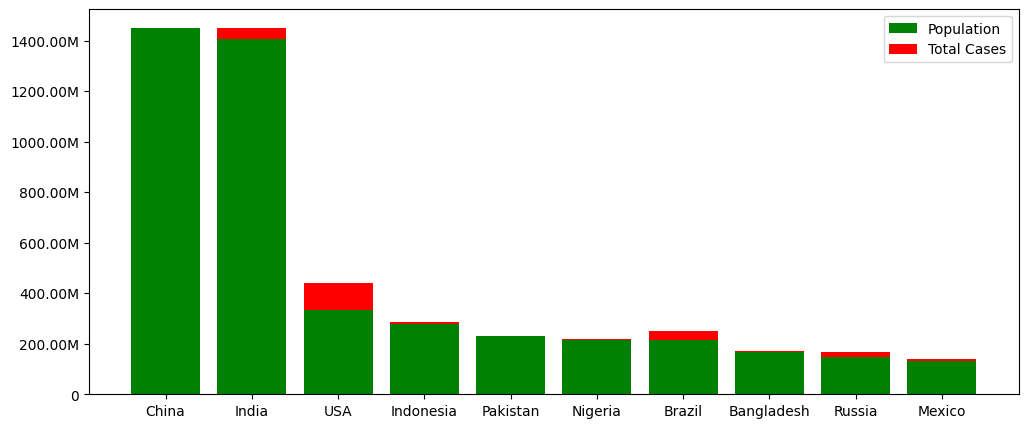

In [204]:
data_2 = covid_df[["Country", "Total Cases", "Population"]].nlargest(n=10, columns=["Population"]).sort_values(ascending=False, by=["Population"])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Set the x-axis tick labels
ax.set_xticks(range(len(data_2)))
ax.set_xticklabels(data_2['Country'])

# Plot the first set of bars
ax.bar(range(len(data_2)), data_2['Population'], color='green', label='Population')

# Plot the second set of bars
ax.bar(range(len(data_2)), data_2['Total Cases'], color='red', label='Total Cases', bottom=data_2['Population'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
# Add a legend
ax.legend()

# Show the plot
plt.show()